In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%run ../src/acc_clusters

In [4]:
original_acc_data = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [22]:
sample_min = 100
x = np.arange(0.0006,0.0003,-0.00001)

In [23]:
mcl = [Ac_cluster(original_acc_data, 300000, eps=eps, min_samples=sample_min) for eps in x]

In [24]:
cl_counts = [mc.cluster_counts['point'].sum() for mc in mcl]

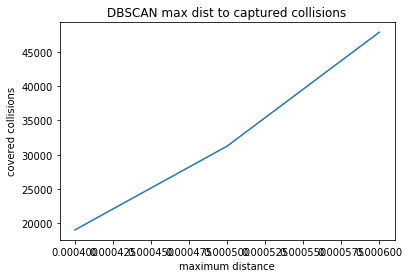

In [19]:
plt.plot(x,cl_counts)
plt.xlabel("maximum distance")
plt.ylabel("covered collisions")
plt.title('DBSCAN max dist to captured collisions')
plt.savefig('../images_part2/dbscan_dist_var_coll_0006.png')

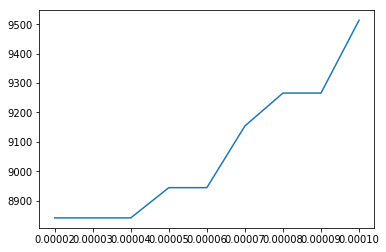

In [8]:
plt.plot(x[90:],cl_counts[90:])

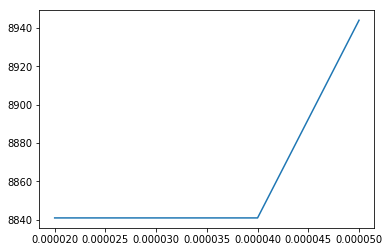

In [9]:
plt.plot(x[95:],cl_counts[95:])

## Now let's look into the number of clusters:

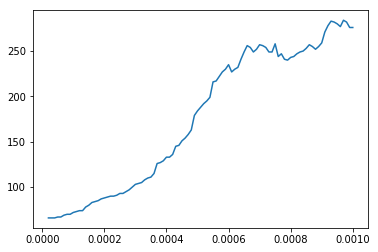

In [10]:
cl_nrs = [len(mc.cluster_counts) for mc in mcl]
plt.plot(x,cl_nrs)

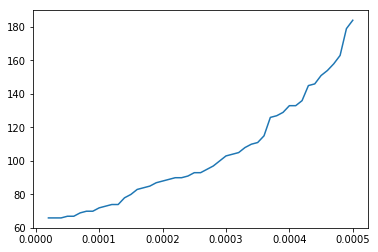

In [11]:
plt.plot(x[50:],cl_nrs[50:])

In [12]:
len(cl_nrs)

99

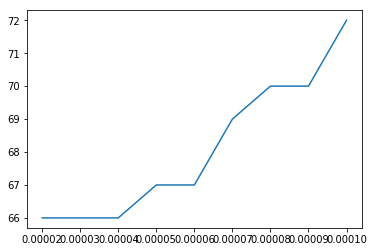

In [13]:
plt.plot(x[90:],cl_nrs[90:])

------------

In [14]:
x, y = mcl[98].get_clusters_head(100)

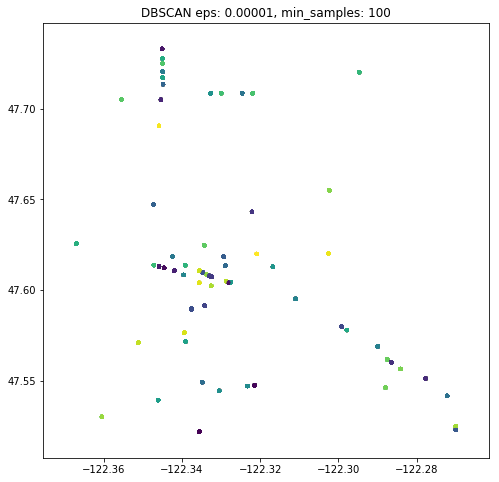

In [20]:

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x[:,0],x[:,1],c=y,marker='.')

plt.title('DBSCAN eps: 0.00001, min_samples: 100')
plt.savefig('../images_part2/dbscan_00001_100_0004.png')

In [36]:
mcl[98].cluster_counts.head()

,point
cluster,
33,291
38,267
47,254
3,252
14,242


In [22]:
x[y==33][:3]

array([[-122.33265538,   47.70865452],
       [-122.33265538,   47.70865452],
       [-122.33265538,   47.70865452]])

### Distance
At a latidude of 47 degrees, a difference in coordinates of 0.0001 represents a distance of 12m. 

(See https://gps-coordinates.org/distance-between-coordinates.php )

We can certainly assume that everything closer than 6m is practically the same adress.